# Actualizar

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from scripts import update
from scripts import plots

## Fecha

In [2]:
fecha = update.fecha()

Fecha (aaaa-mm-dd):


 2020-04-07


## Descargar archivos

In [3]:
outdir_pdf = '../datos/ssalud_pdf'
ss_url = 'https://www.gob.mx/salud/documentos/coronavirus-covid-19-comunicado-tecnico-diario-238449'

In [ ]:
update.extract_documents(ss_url, outdir=outdir_pdf)

## Convertir pdf de casos confirmados

In [4]:
outdir_tsv = '../datos/tablas_positivos'

save_name = '{}/{}_positivos.tsv'.format(outdir_tsv, fecha.strftime('%Y%m%d'))
pdf = '{}/Tabla_casos_positivos_COVID-19_resultado_InDRE_{}.pdf'.format(outdir_pdf, fecha.strftime('%Y.%m.%d'))

### 2020-04-02

### 2020-04-03

### 2020-04-04

### 2020-04-05

### 2020-04-06

In [ ]:
# no hay celdas azules
df_confirmados = update.parse_pdf(pdf, save_name=save_name, exception={'header': ['num_caso', 'estado', 'sexo', 'edad', 'fecha_inicio_sintomas', 'id_rt-pcr', 'procedencia']})

### 2020-04-07

In [5]:
df_confirmados = update.parse_pdf(pdf, save_name=save_name)

61 paginas
No se agregara información sobre casos nuevos. (Celdas en azul.)


## Actualizar tabla de relación fecha-archivo

In [23]:
info_path = '../datos/tablas_procesadas/info_tablas.tsv'

df_info = update.update_info(info_path, fecha, pdf, save_name)

2020-04-07 00:00:00 already in table


## Datos generales del comunicado técnico

In [24]:
comtec_path = '../datos/tablas_comunicado/'

df_comtec = update.comunicado_tecnico(fecha, save=comtec_path)

Número de casos confirmados:


KeyboardInterrupt: 

## Figuras

In [25]:
save_figures = '../figuras'
save_current = '../docs/assets/figures'

In [20]:
update.html_table(df_comtec, save=save_figures, current_html=save_current)

Saved in ../figuras/20200407_tableheader.html
Saved in ../docs/assets/figures/CURRENT_tableheader.html


Saved in ../figuras/20200407_casosconfirmados-nacional.html
Saved in ../docs/assets/figures/CURRENT_casosconfirmados-nacional.html


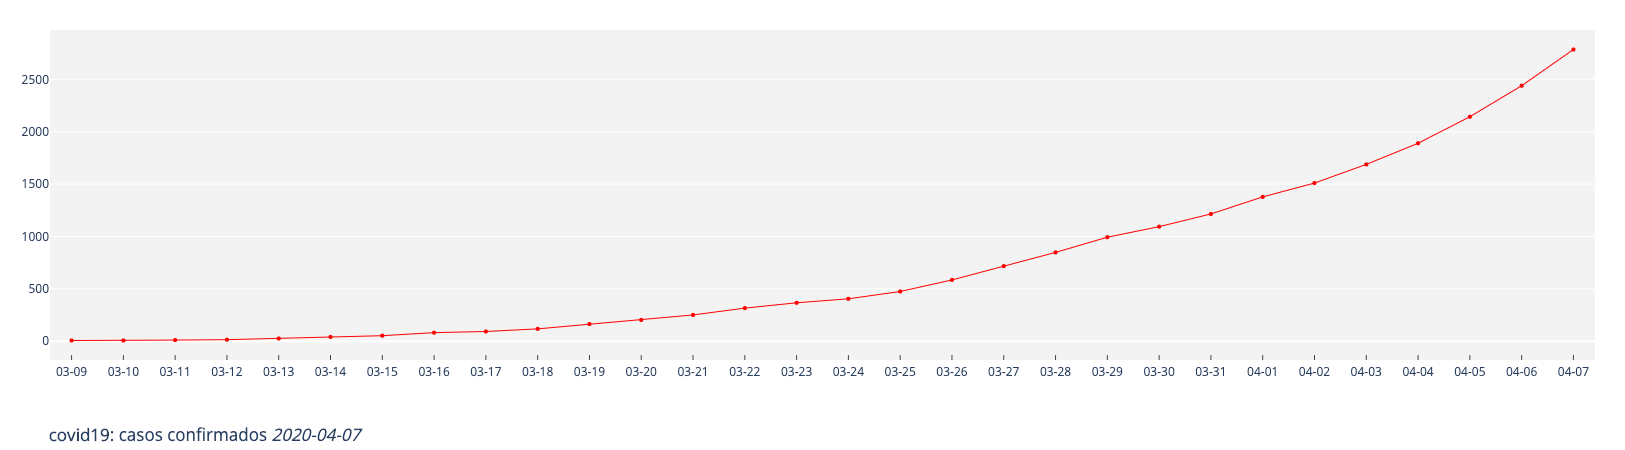

Saved in ../figuras/20200407_mapa-confirmados.html
Saved in ../docs/assets/figures/CURRENT_mapa-confirmados.html


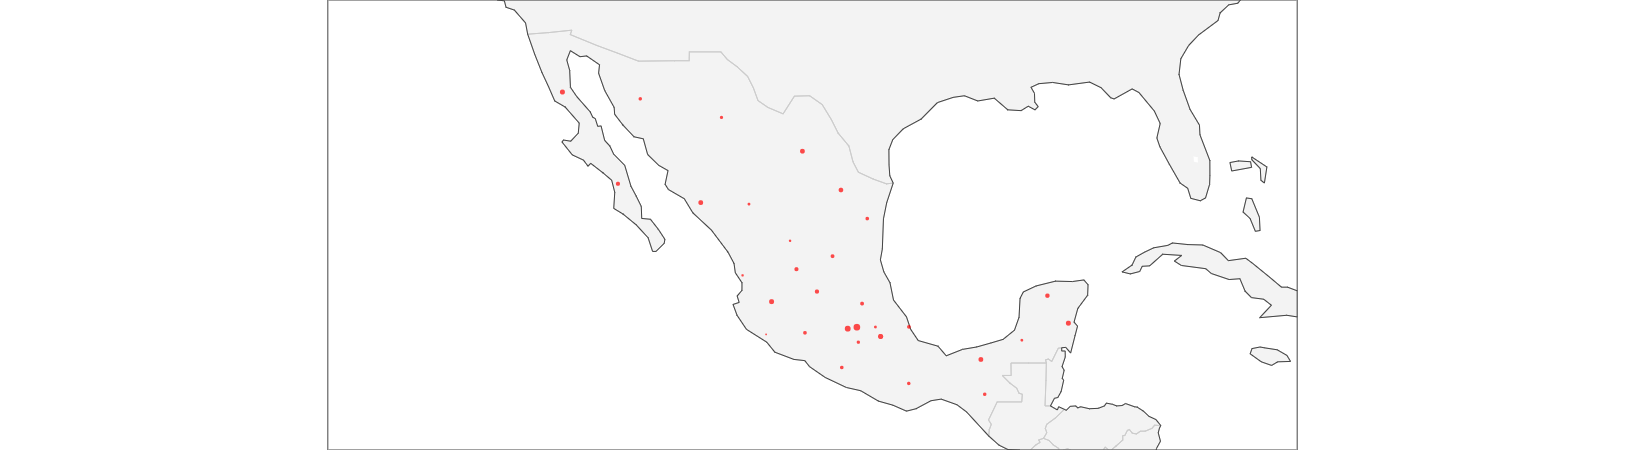

In [26]:
plots.plot_cofirmados('../datos/tablas_comunicado/', save=save_figures, current_html=save_current)
plots.plot_map(save_name, fecha, save=save_figures, current_html=save_current)